## About Dataset
dataset
This is data that confirmed the grade of performance with age and some exercise performance data.

columns
data shape : (13393, 12)

age : 20 ~64
gender : F,M
height_cm : (If you want to convert to feet, divide by 30.48)
weight_kg
body fat_%
diastolic : diastolic blood pressure (min)
systolic : systolic blood pressure (min)
gripForce
sit and bend forward_cm
sit-ups counts
broad jump_cm
class : A,B,C,D ( A: best) / stratified

In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
data = pd.read_csv("bodyPerformance.csv")

In [3]:
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
data.tail()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
13388,25.0,M,172.1,71.8,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.9,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.5,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.7,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D
13392,34.0,M,164.0,66.1,19.5,82.0,150.0,35.9,7.1,51.0,180.0,C


In [5]:
data.shape

(13393, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [7]:
# Check If There is any null value 
data.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [8]:
# Check Any duplicet values are there in data set
data.duplicated().sum()

1

In [9]:
# Drop Duplicet value 
data.drop_duplicates(inplace=True)

In [10]:
# Saprate numerical and catigorical data
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['gender', 'class'], dtype='object')
Index(['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic',
       'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')


In [11]:
# Chack All unique values in catigorical data
for i in catigorical_features:
    print(i,data[i].unique())

gender ['M' 'F']
class ['C' 'A' 'B' 'D']


In [12]:
# Chack All  values counts in catigorical data
for i in catigorical_features:
    print(i,data[i].value_counts())

gender M    8467
F    4925
Name: gender, dtype: int64
class C    3349
D    3349
A    3347
B    3347
Name: class, dtype: int64


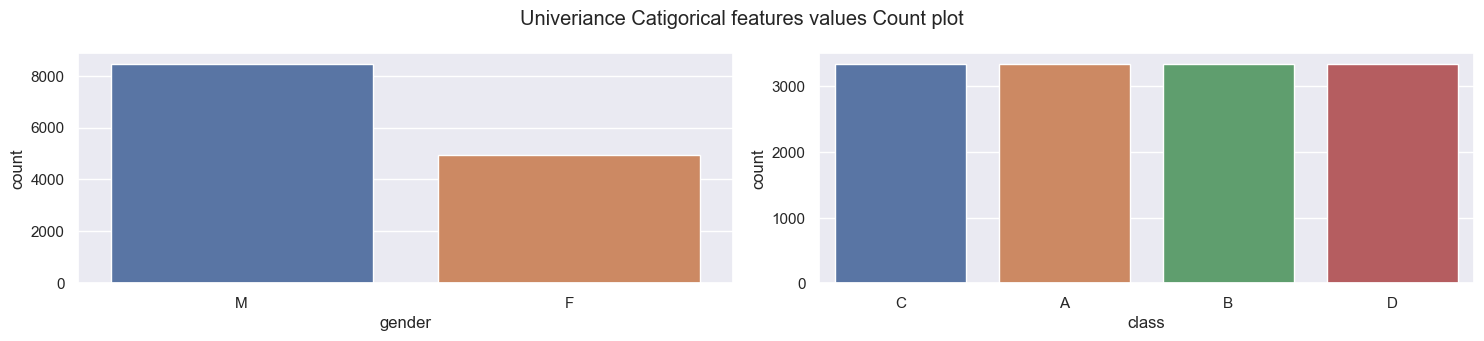

In [13]:
plt.suptitle("Univeriance Catigorical features values Count plot")
for i in range(0,len(catigorical_features)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=data[catigorical_features[i]])
    plt.tight_layout()

In [14]:
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000,13392.000000
mean,36.775836,168.560671,67.448686,23.239608,78.797499,130.238120,36.964569,15.208933,39.770385,190.131355
std,13.625886,8.426305,11.949061,7.256829,10.742165,14.709536,10.624959,8.456904,14.276902,39.868988
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


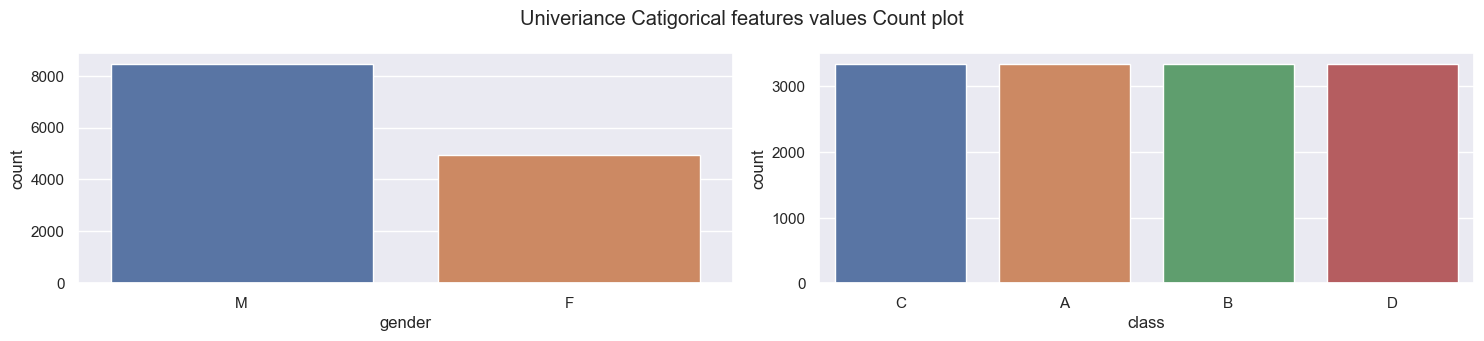

In [15]:
try:
    plt.suptitle("Univeriance Catigorical features values Count plot")
    for i in range(0,len(catigorical_features)):
        plt.subplot(2,2,i+1)
        sns.countplot(x=data[catigorical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

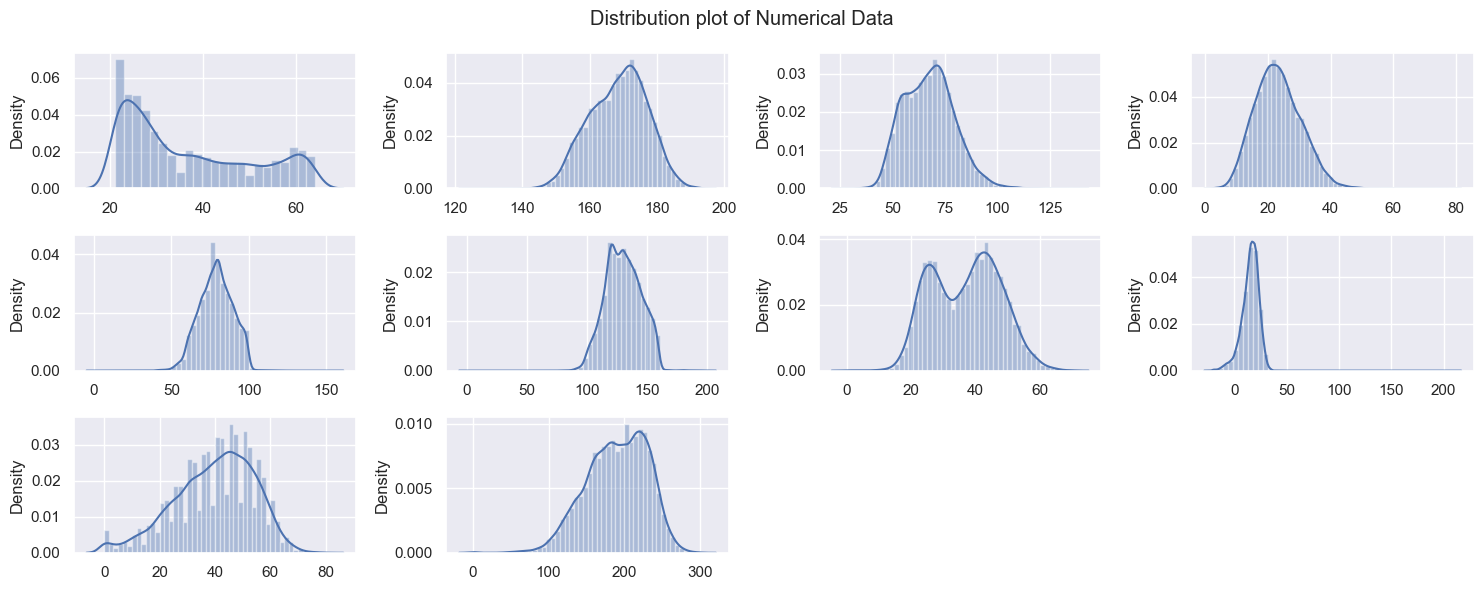

In [16]:
try:
    plt.suptitle("Distribution plot of Numerical Data")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.distplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

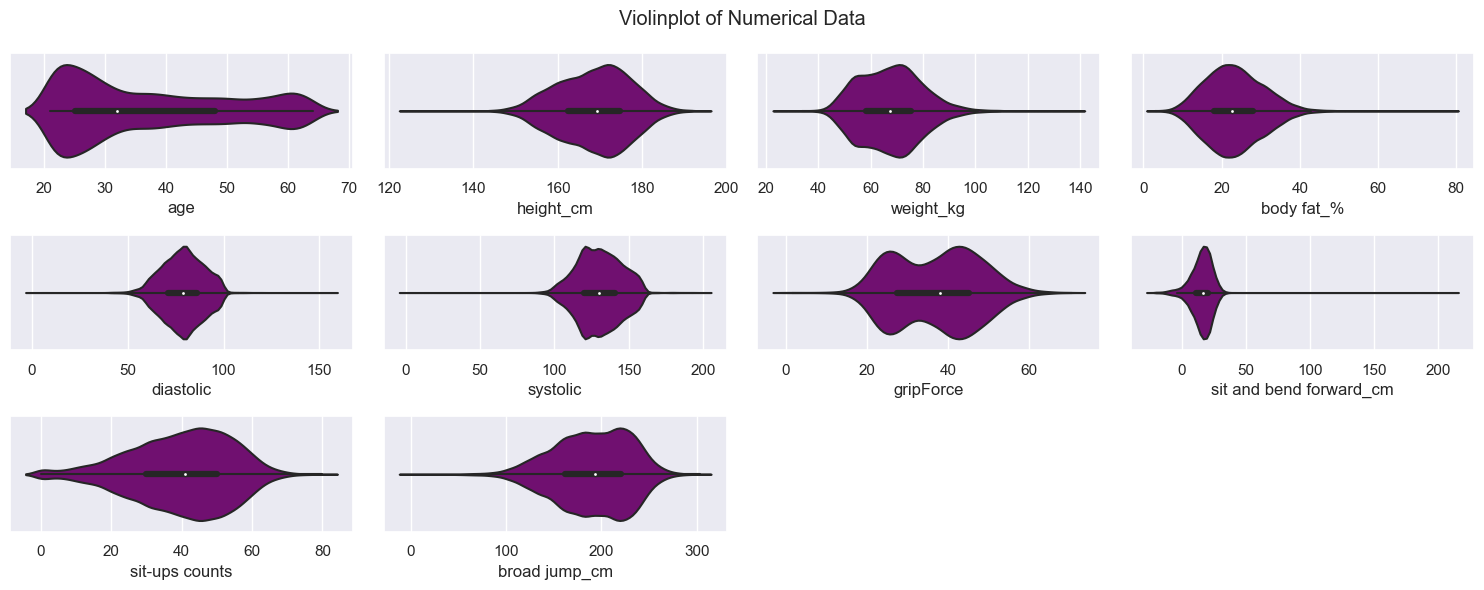

In [17]:
try:
    plt.suptitle("Violinplot of Numerical Data")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.violinplot(x=data[numerical_features[i]],color="purple")
        plt.tight_layout()
except Exception as e:
    print(e)

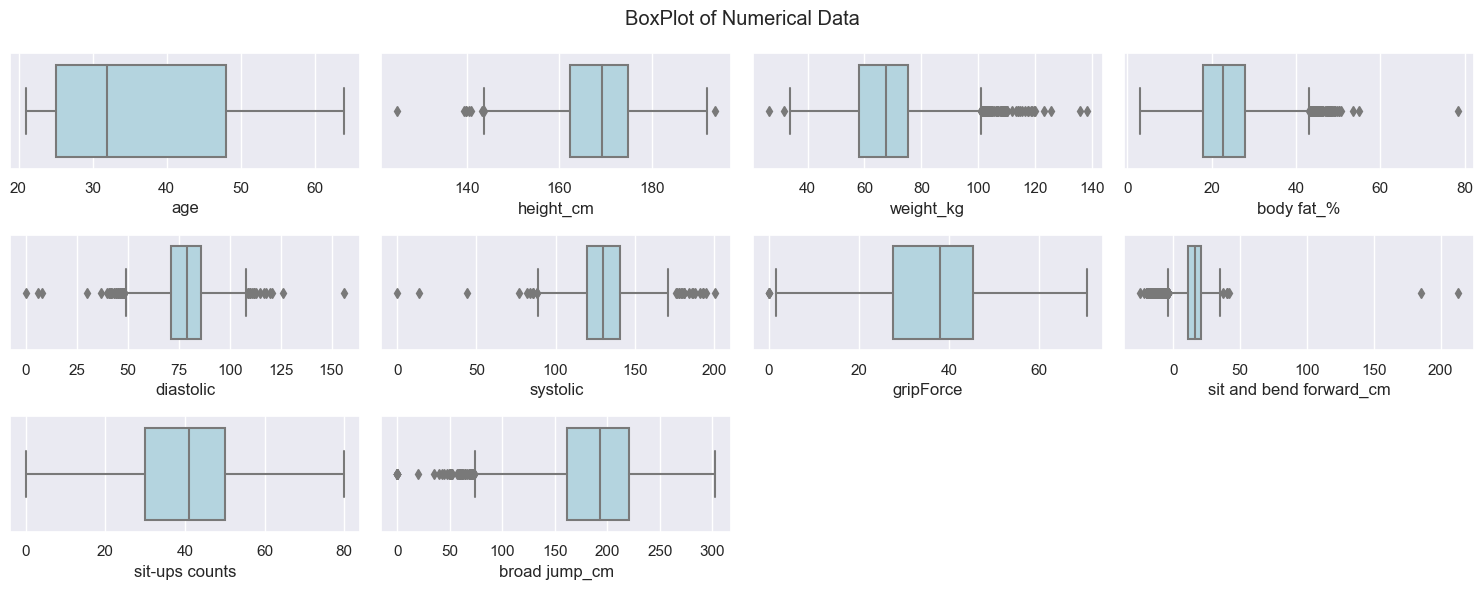

In [18]:
try:
    plt.suptitle("BoxPlot of Numerical Data")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.boxplot(x=data[numerical_features[i]],color="lightblue")
        plt.tight_layout()
except Exception as e:
    print(e)

<AxesSubplot:xlabel='gender'>

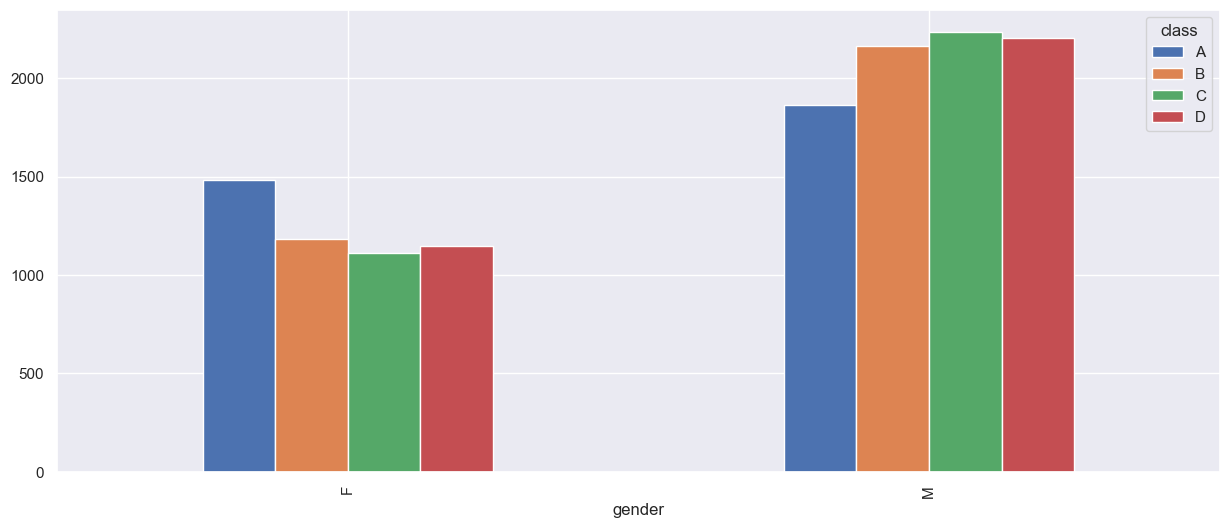

In [19]:
# Compare Class and Gender
gender = pd.crosstab(data["gender"],data["class"])
gender.plot(kind="bar")

In [20]:
# Convert Data in Binary Male 1 and  Female 0
data["gender"] = data["gender"].map({"M":1,"F":0})

In [21]:
# So we have 4 class now We converted in to Binary A:Excilent,B:Good,C:Balance,D:Need To Workout
# data["class"] = data["class"].map({"A":1,"B":1,"C":0,"D":0})
data["class"] = data["class"].map({"A":0,"B":1,"C":2,"D":3})

<AxesSubplot:>

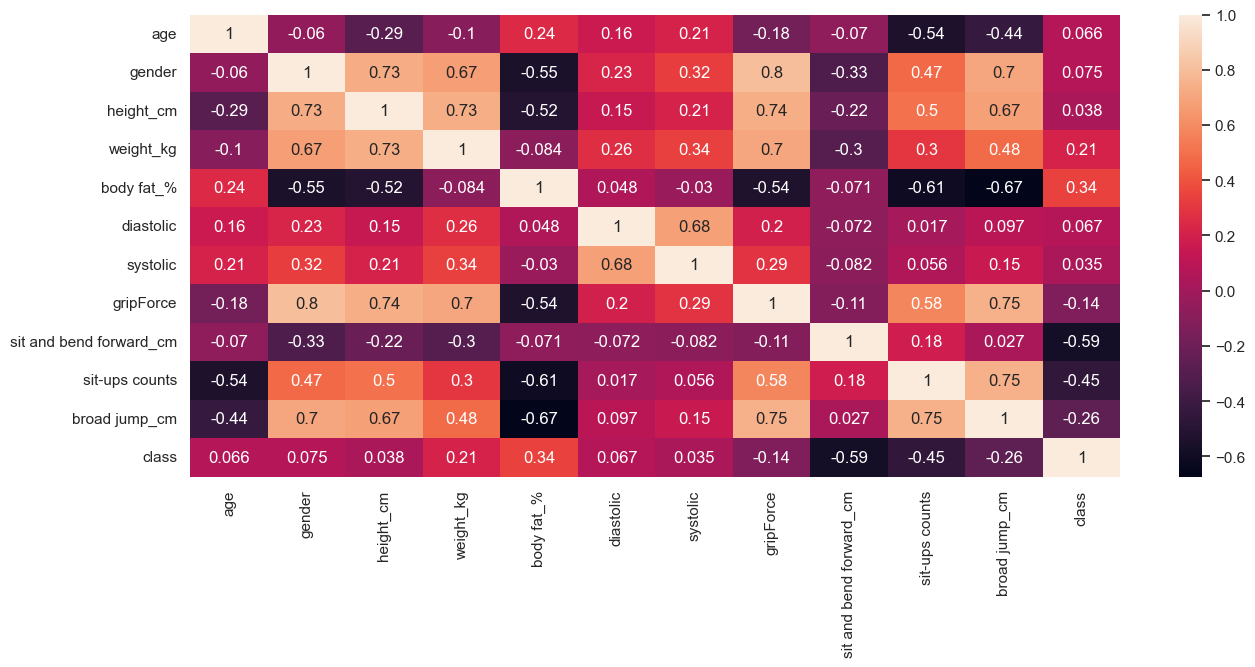

In [22]:
sns.heatmap(data.corr(),annot=True)

In [23]:
# drop Negativaly Co related Colums
data.drop(["gripForce","sit and bend forward_cm","sit-ups counts","broad jump_cm"],axis=1,inplace=True)

## Model Traning

In [24]:
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,1
...,...,...,...,...,...,...,...,...
13388,25.0,1,172.1,71.80,16.2,74.0,141.0,2
13389,21.0,1,179.7,63.90,12.1,74.0,128.0,3
13390,39.0,1,177.2,80.50,20.1,78.0,132.0,0
13391,64.0,0,146.1,57.70,40.4,68.0,121.0,3


In [25]:
data.shape

(13392, 8)

In [26]:
# Saprate Dependent And Indipendent Featrues
x = data.drop("class",axis=1)
y = data["class"]

In [27]:
# Saprate numerical and catigorical data
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic'],
      dtype='object')


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [29]:
# Create Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

# Create preprocessing Object
preprocerror = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])

In [30]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10713, 7)
(2679, 7)
(10713,)
(2679,)


In [32]:
# Transform Columns
X_train = preprocerror.fit_transform(X_train)
X_test = preprocerror.transform(X_test)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay